# "Mammoth" dataset visualization with t-SNE, UMAP, TriMAP, PaCMAP and IVHD

## Let's load the mammoth points to lists and try to visualize it.

### All imports

In [1]:
import json
from pathlib import Path
 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

import umap.umap_ as umap
from sklearn.manifold import TSNE

#### Use this for interactive plots you can rotate, etc.

In [2]:
# if you run your notebooks using VSCode (you have to also: pip install ipympl)
%matplotlib widget

# if you run your notebooks with just Jupyter
#%matplotlib notebook

#### Now, let's load the data from either github repository or from your drive

In [3]:
# Mammoth dataset points 10k and 50k points
mammoth_10k_url = 'https://raw.githubusercontent.com/PAIR-code/understanding-umap/master/raw_data/mammoth_3d.json'
mammoth_50k_url = 'https://raw.githubusercontent.com/PAIR-code/understanding-umap/master/raw_data/mammoth_3d_50k.json'

In [4]:
downloaded = False
# If you don't have it downloaded:
if not downloaded:
    import urllib.request
    with urllib.request.urlopen(mammoth_10k_url) as url:
        mammoth_data = json.loads(url.read().decode())
        
# If you have mammoth_data downloaded
else:
    with open('data/mammoth_3d.json') as f:
        mammoth_data = json.load(f)

xyz = [[p[i] for p in mammoth_data] for i in range(3)]
x,y,z = xyz[2], xyz[0], xyz[1]
mammoth_classes = np.array([i for i in range(10) for _ in range(1000)])

#### We can now visualize the mammoth dataset points with pyplot

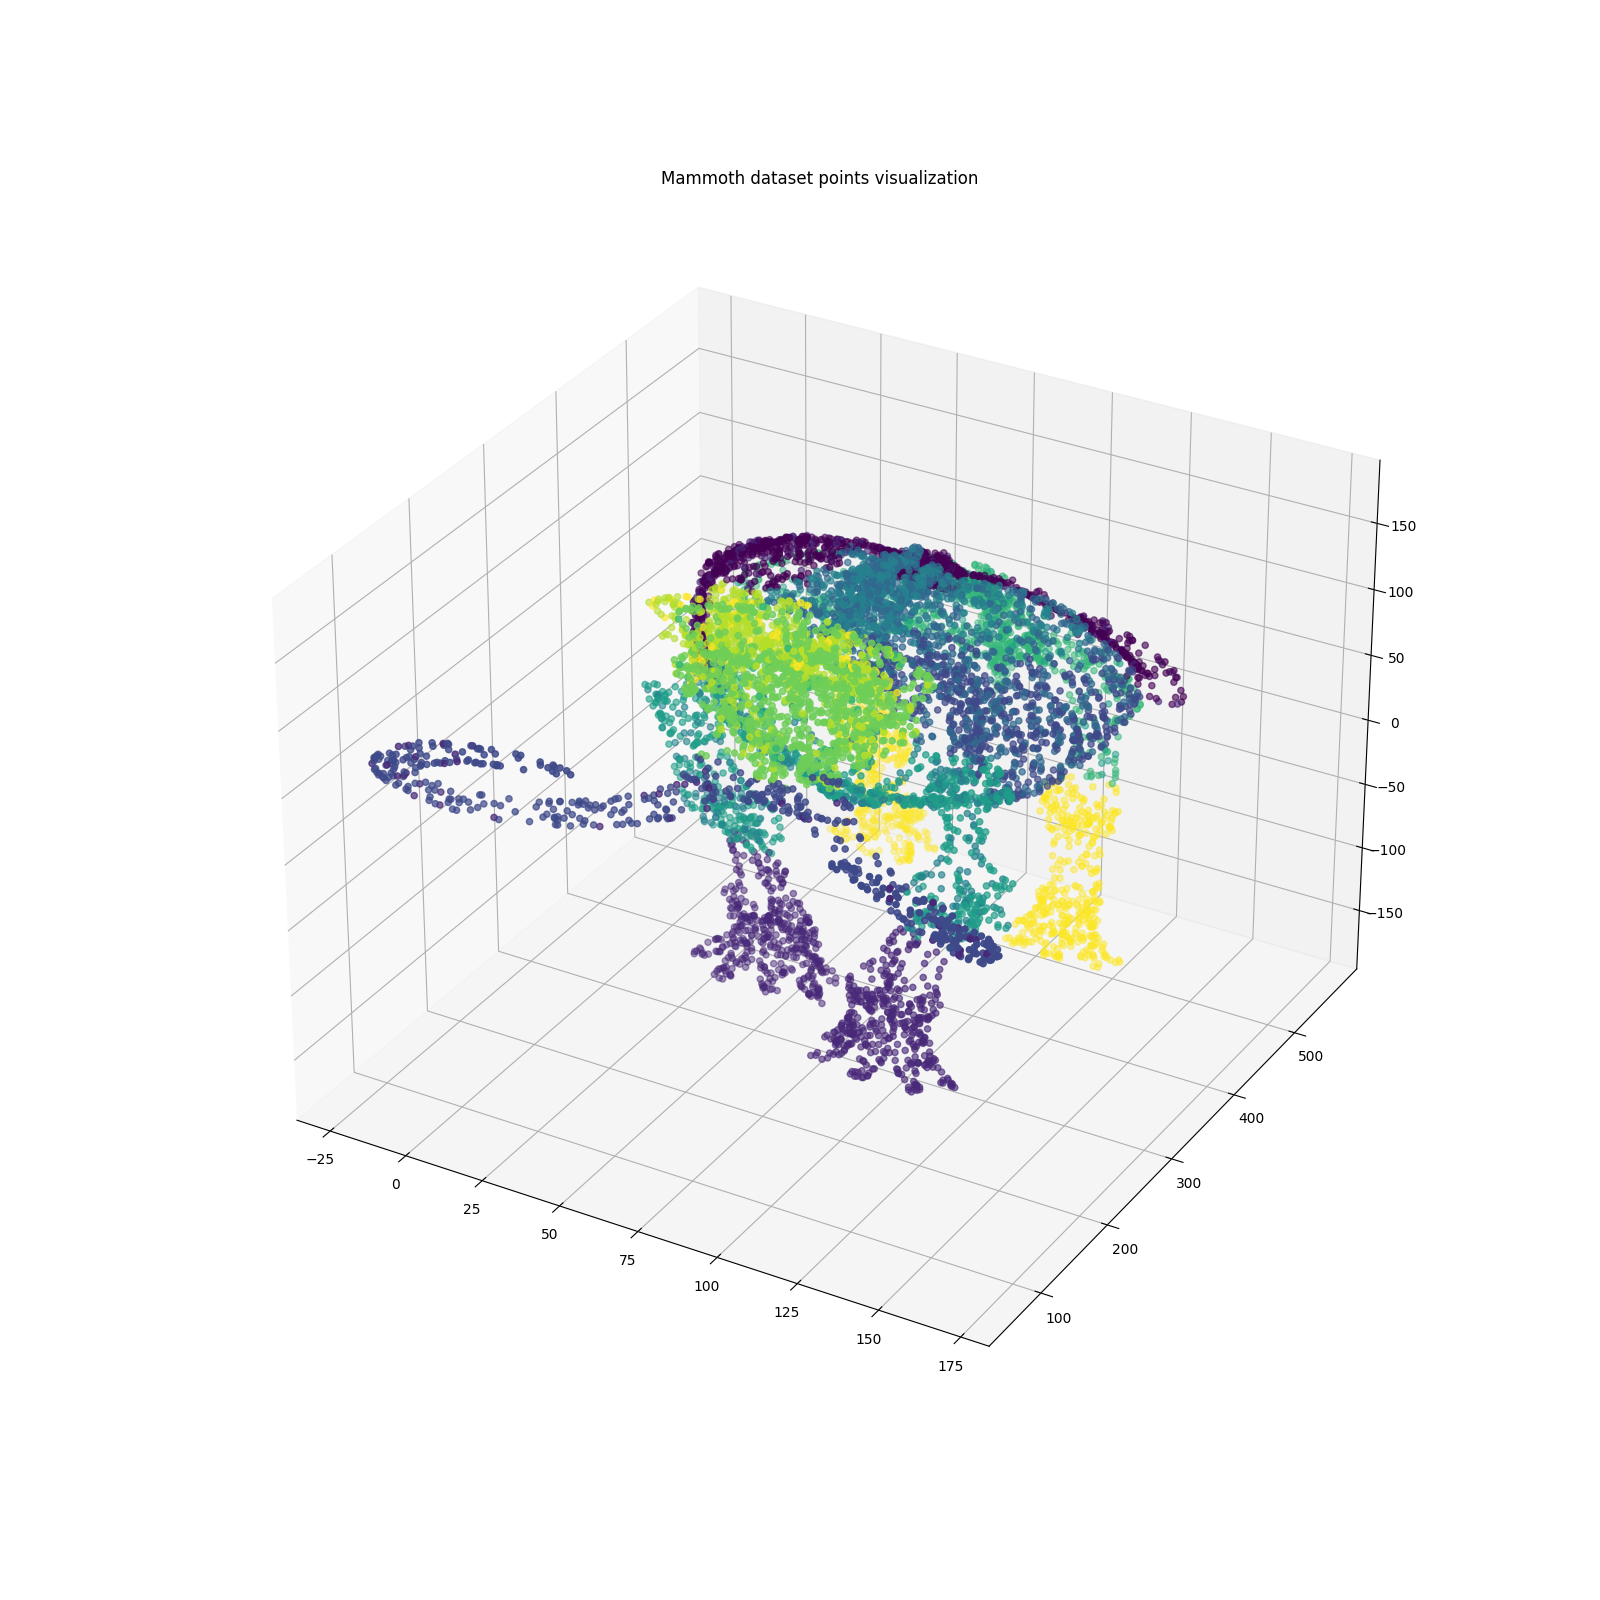

In [6]:
# Now let's visualize the mammoth data using pyplot
def plot_3d_mammoth_scatter(x,y,z,mammoth_classes):
    fig = plt.figure(figsize=(16,16))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs=x, ys=y, zs=z, c=mammoth_classes)
    plt.title("Mammoth dataset points visualization")
    plt.show()

plot_3d_mammoth_scatter(x,y,z,mammoth_classes)

## Let's now transform the mammoth data to 2d using various methods

### Simple plot function to draw mammoth 2d visualizations

In [7]:
def plot_2d_mammoth_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)

    for i in range(10):
        digit_indices = (y == i)

        dim1 = X[digit_indices, 0]
        dim2 = X[digit_indices, 1]
        plot.scatter(dim1, dim2, label=f"'{i}'")

    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()

### First let's make dataframe and scale our data for better results in 2d

In [8]:
data_mammoth = np.array([xyz[2], xyz[0], xyz[1]]).transpose()
min_max_scaler = preprocessing.MinMaxScaler()
data_mammoth_scaled = min_max_scaler.fit_transform(data_mammoth)

columns_mammoth = ['x', 'y', 'z']
df_mammoth = pd.DataFrame(data=data_mammoth_scaled, columns=columns_mammoth)

df_mammoth.head(15)

x         y         z
0   0.243010  0.728091  0.810569
1   0.190200  0.662922  0.788558
2   0.801630  0.825924  0.735012
3   0.185681  0.712159  0.754896
4   0.522500  0.696609  0.829465
5   0.244617  0.573968  0.634007
6   0.183193  0.628288  0.720932
7   0.232100  0.746069  0.783662
8   0.200754  0.689638  0.783188
9   0.497822  0.725899  0.872186
10  0.486970  0.757991  0.851584
11  0.745355  0.783663  0.775780
12  0.263989  0.743847  0.811163
13  0.706032  0.748121  0.828729
14  0.521373  0.719999  0.872581

## t-SNE

In [9]:
tsne_p40 = TSNE(n_components=2, init="pca", learning_rate='auto', perplexity=40)
tsne_p120 = TSNE(n_components=2, init="pca", learning_rate='auto', perplexity=120)
tsne_p500 = TSNE(n_components=2, init="pca", learning_rate='auto', perplexity=500)

x_40_mammoth = tsne_p40.fit_transform(df_mammoth)
x_120_mammoth = tsne_p120.fit_transform(df_mammoth)
x_500_mammoth = tsne_p500.fit_transform(df_mammoth)

/home/ewer/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/ewer/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/ewer/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


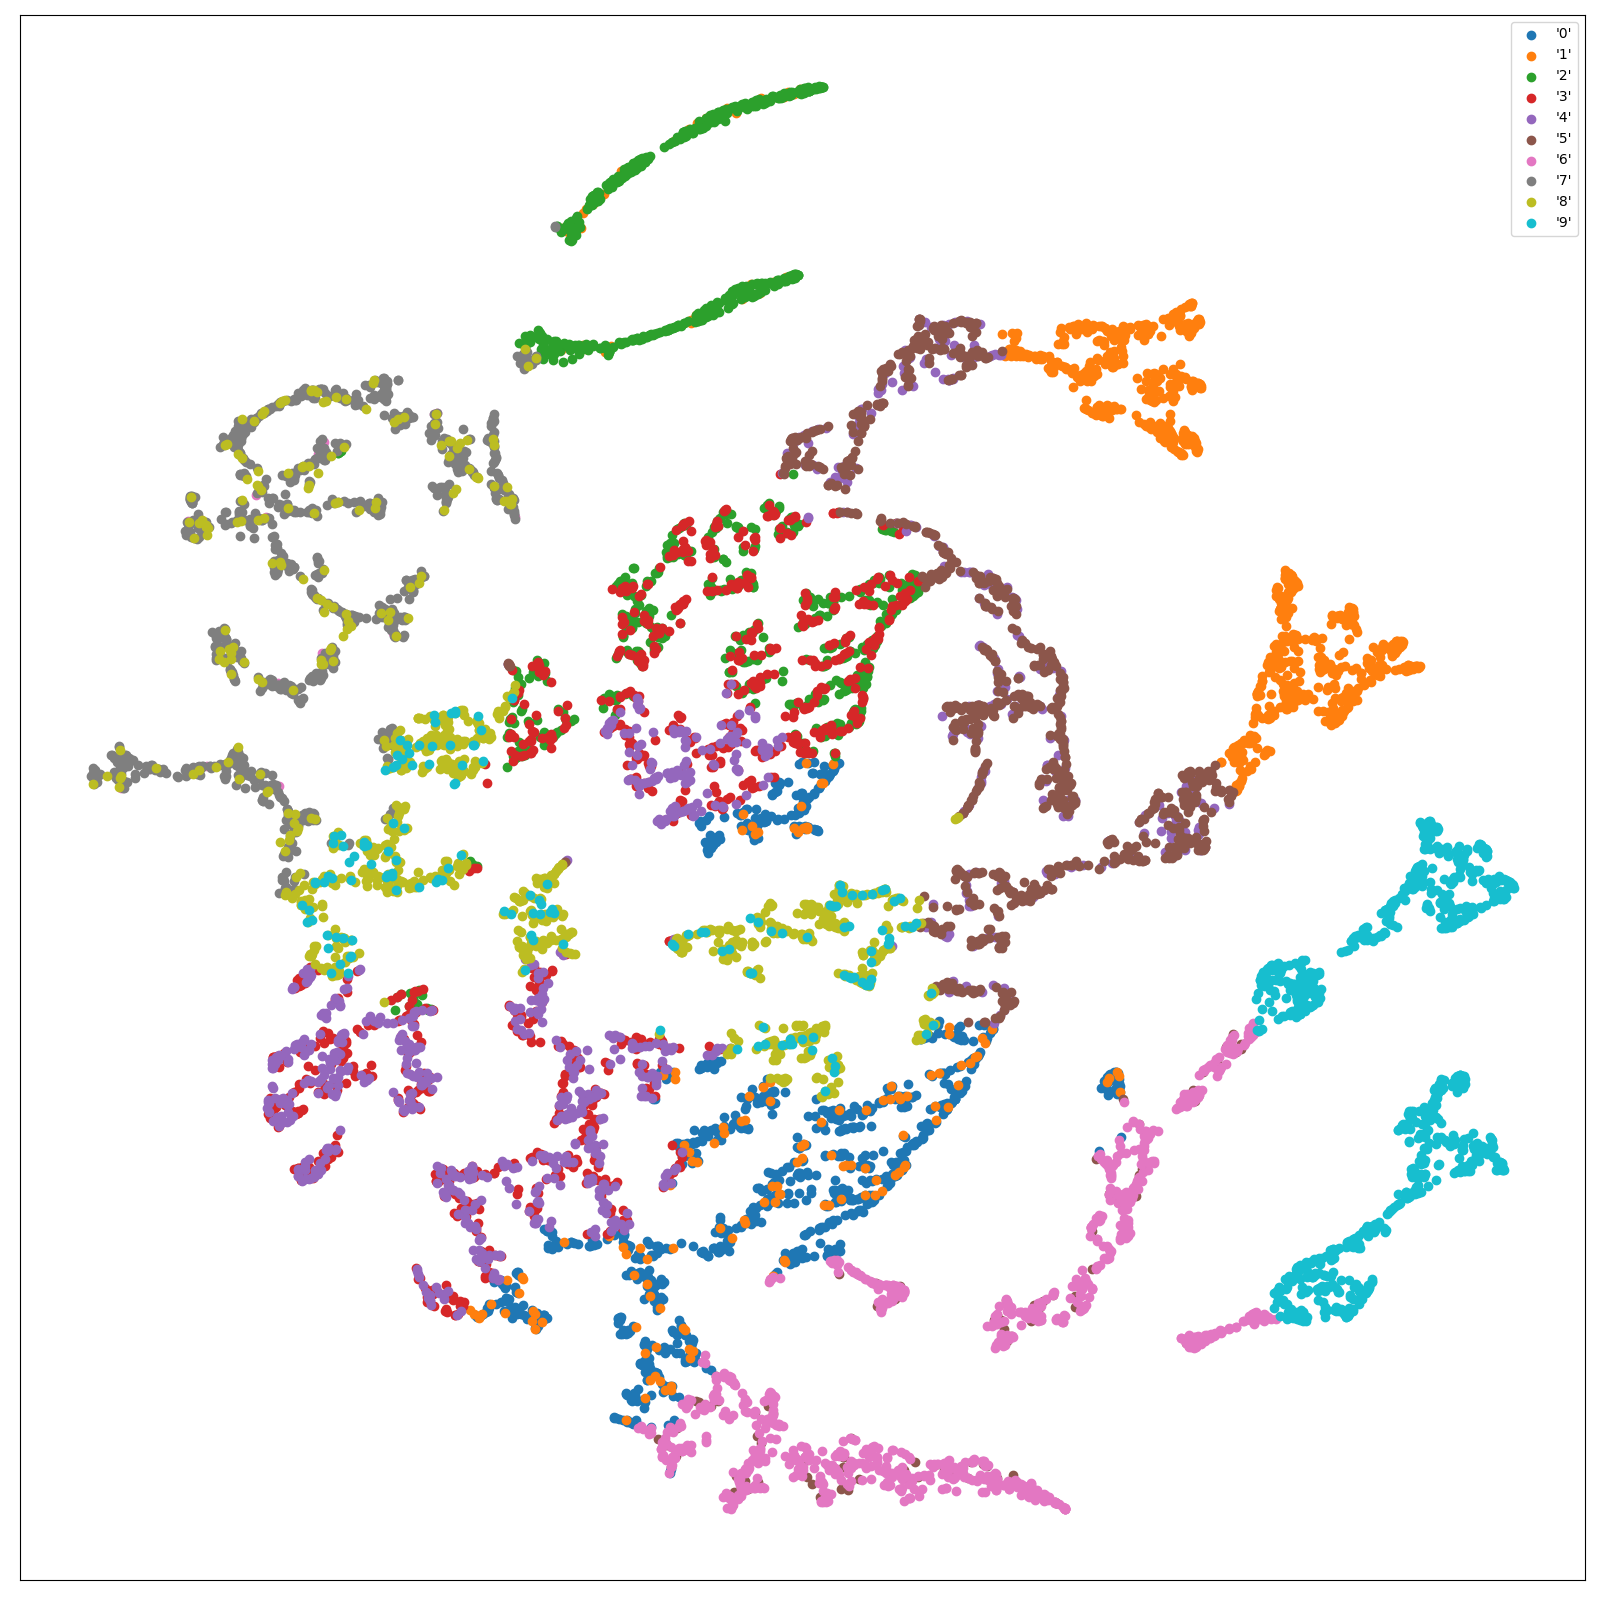

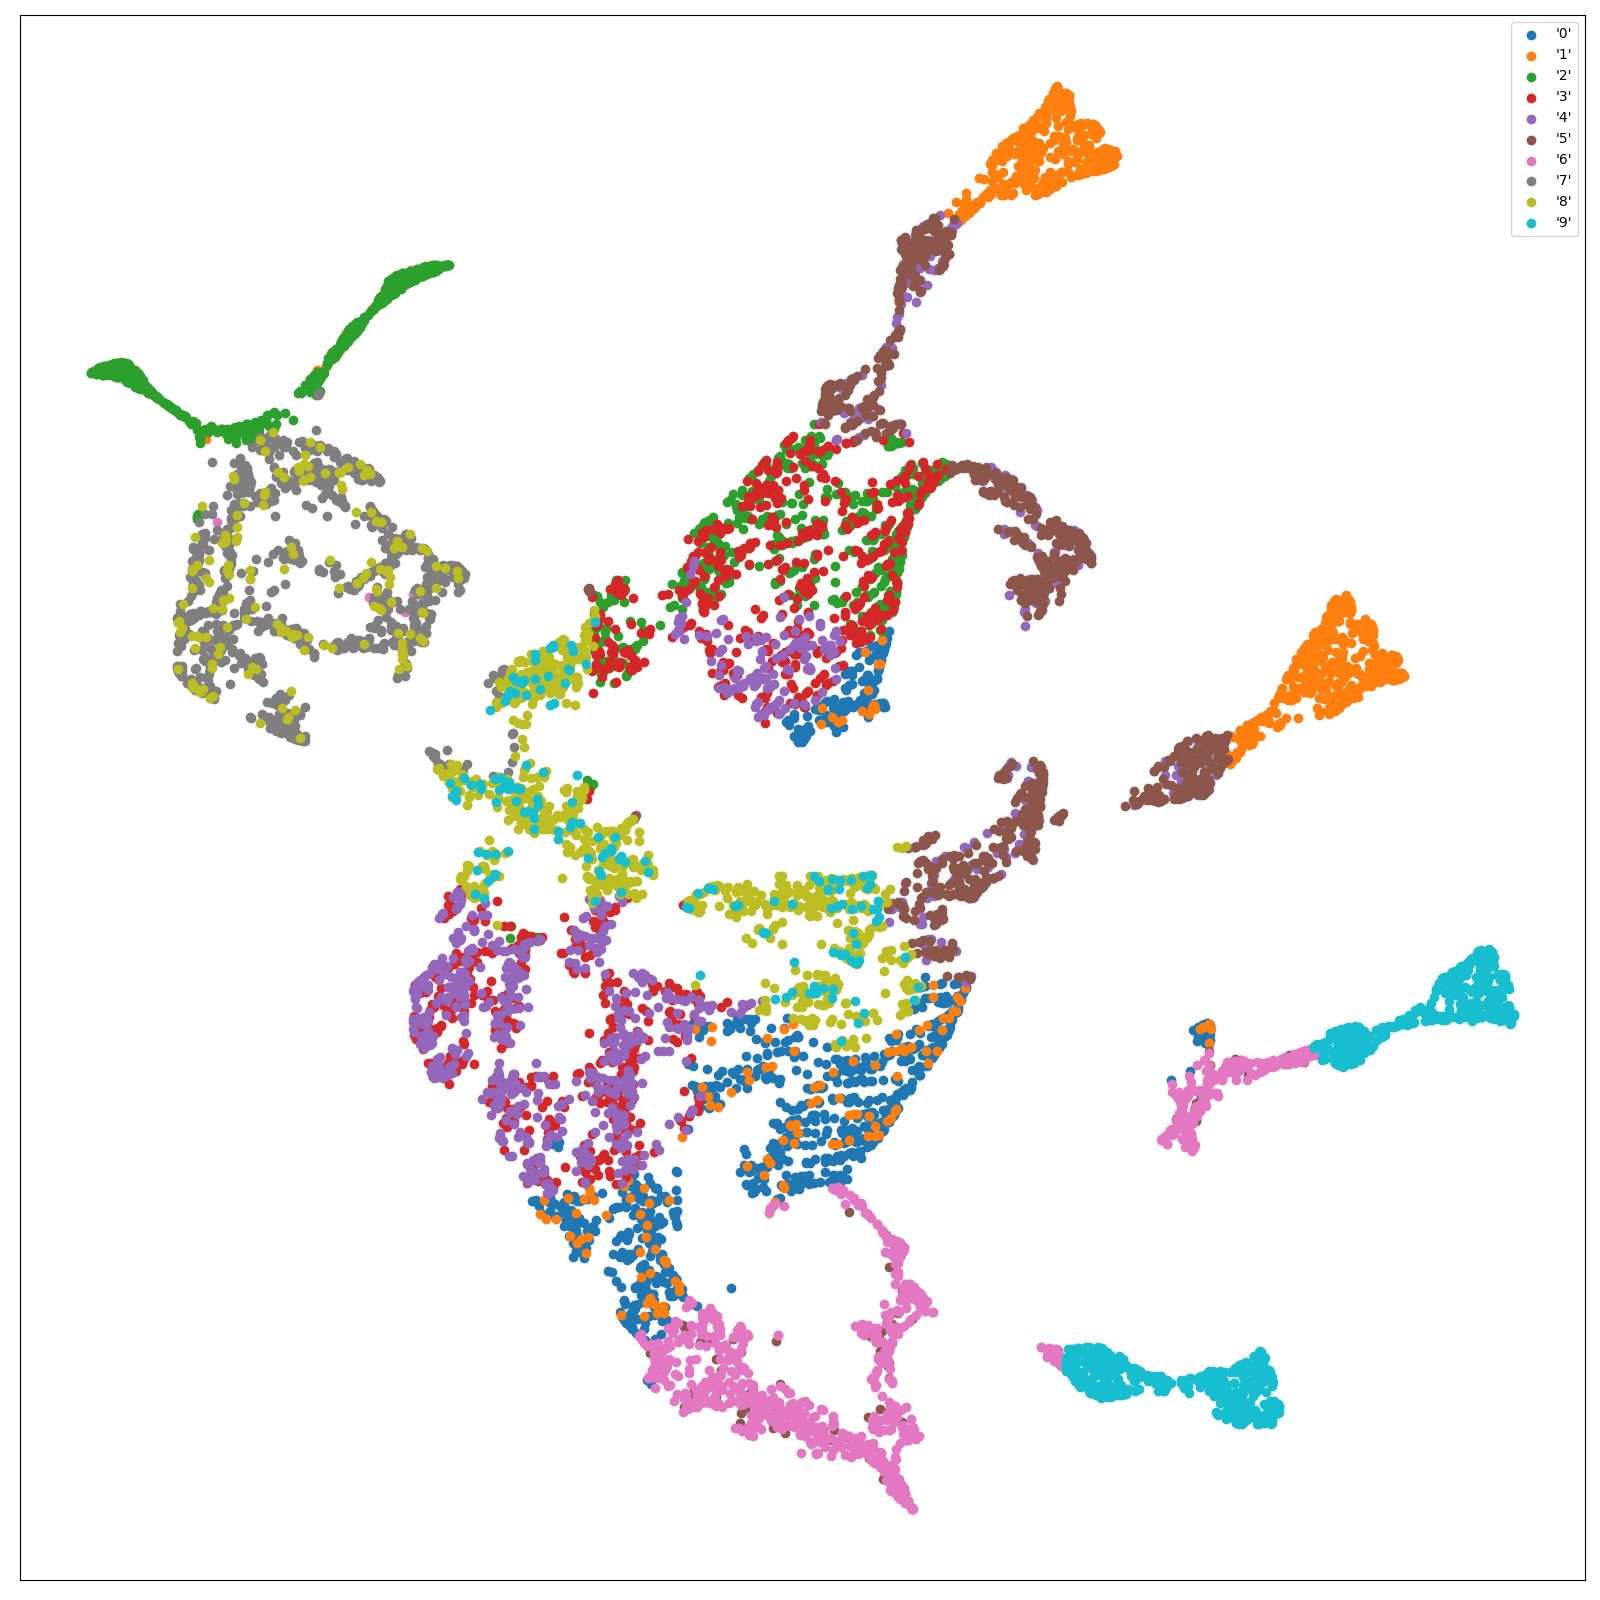

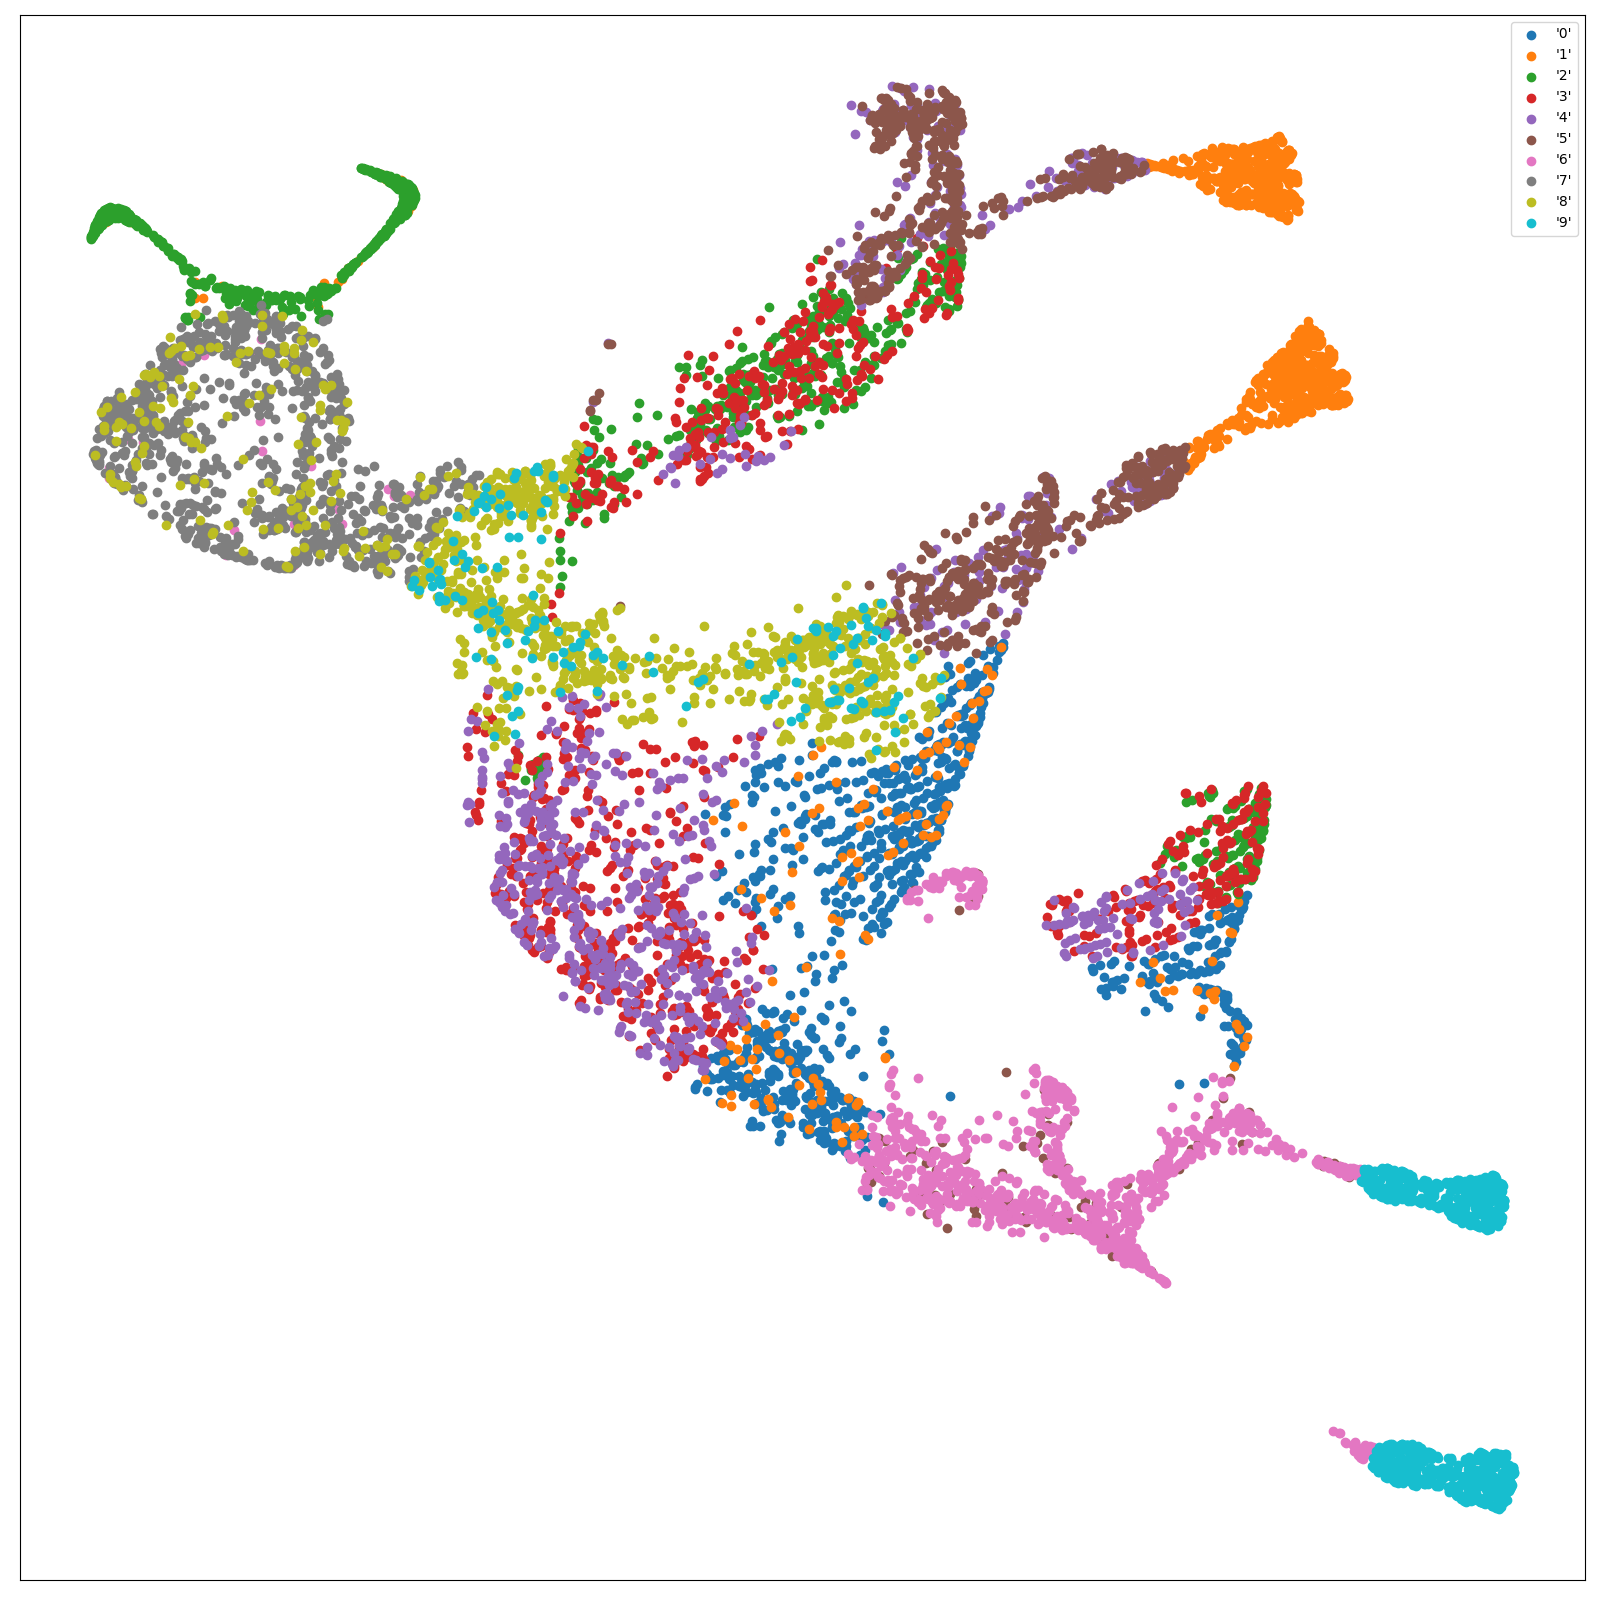

In [10]:
plot_2d_mammoth_scatter(x_40_mammoth, mammoth_classes)
plot_2d_mammoth_scatter(x_120_mammoth, mammoth_classes)
plot_2d_mammoth_scatter(x_500_mammoth, mammoth_classes)

## UMAP

In [11]:
umap_nn10 = umap.UMAP(n_neighbors=10)
umap_nn20 = umap.UMAP(n_neighbors=20)
umap_nn50 = umap.UMAP(n_neighbors=50)

x_10_umap = umap_nn10.fit_transform(df_mammoth)
x_20_umap = umap_nn20.fit_transform(df_mammoth)
x_50_umap = umap_nn50.fit_transform(df_mammoth)

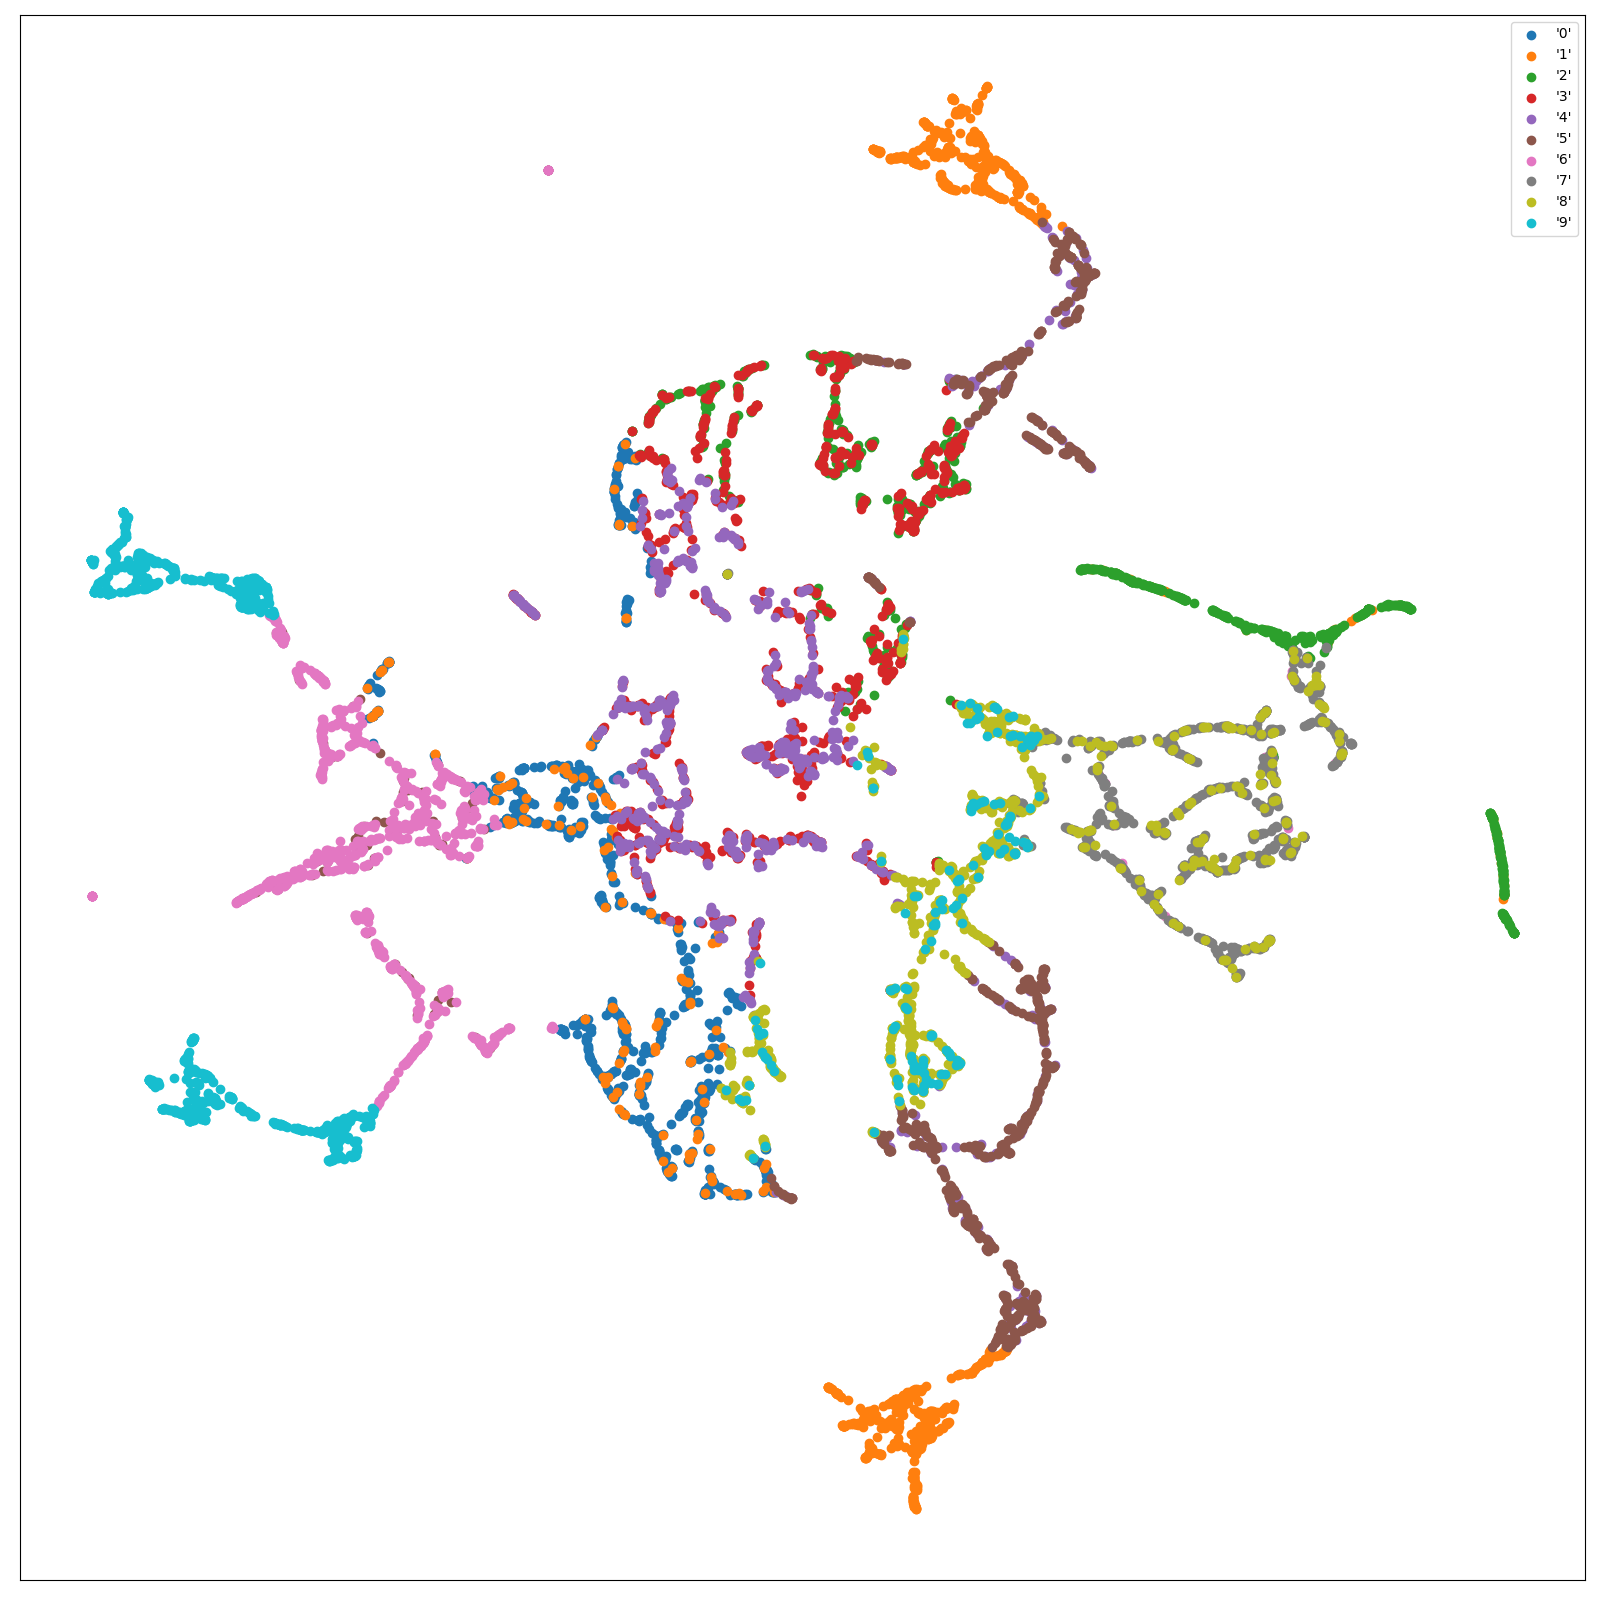

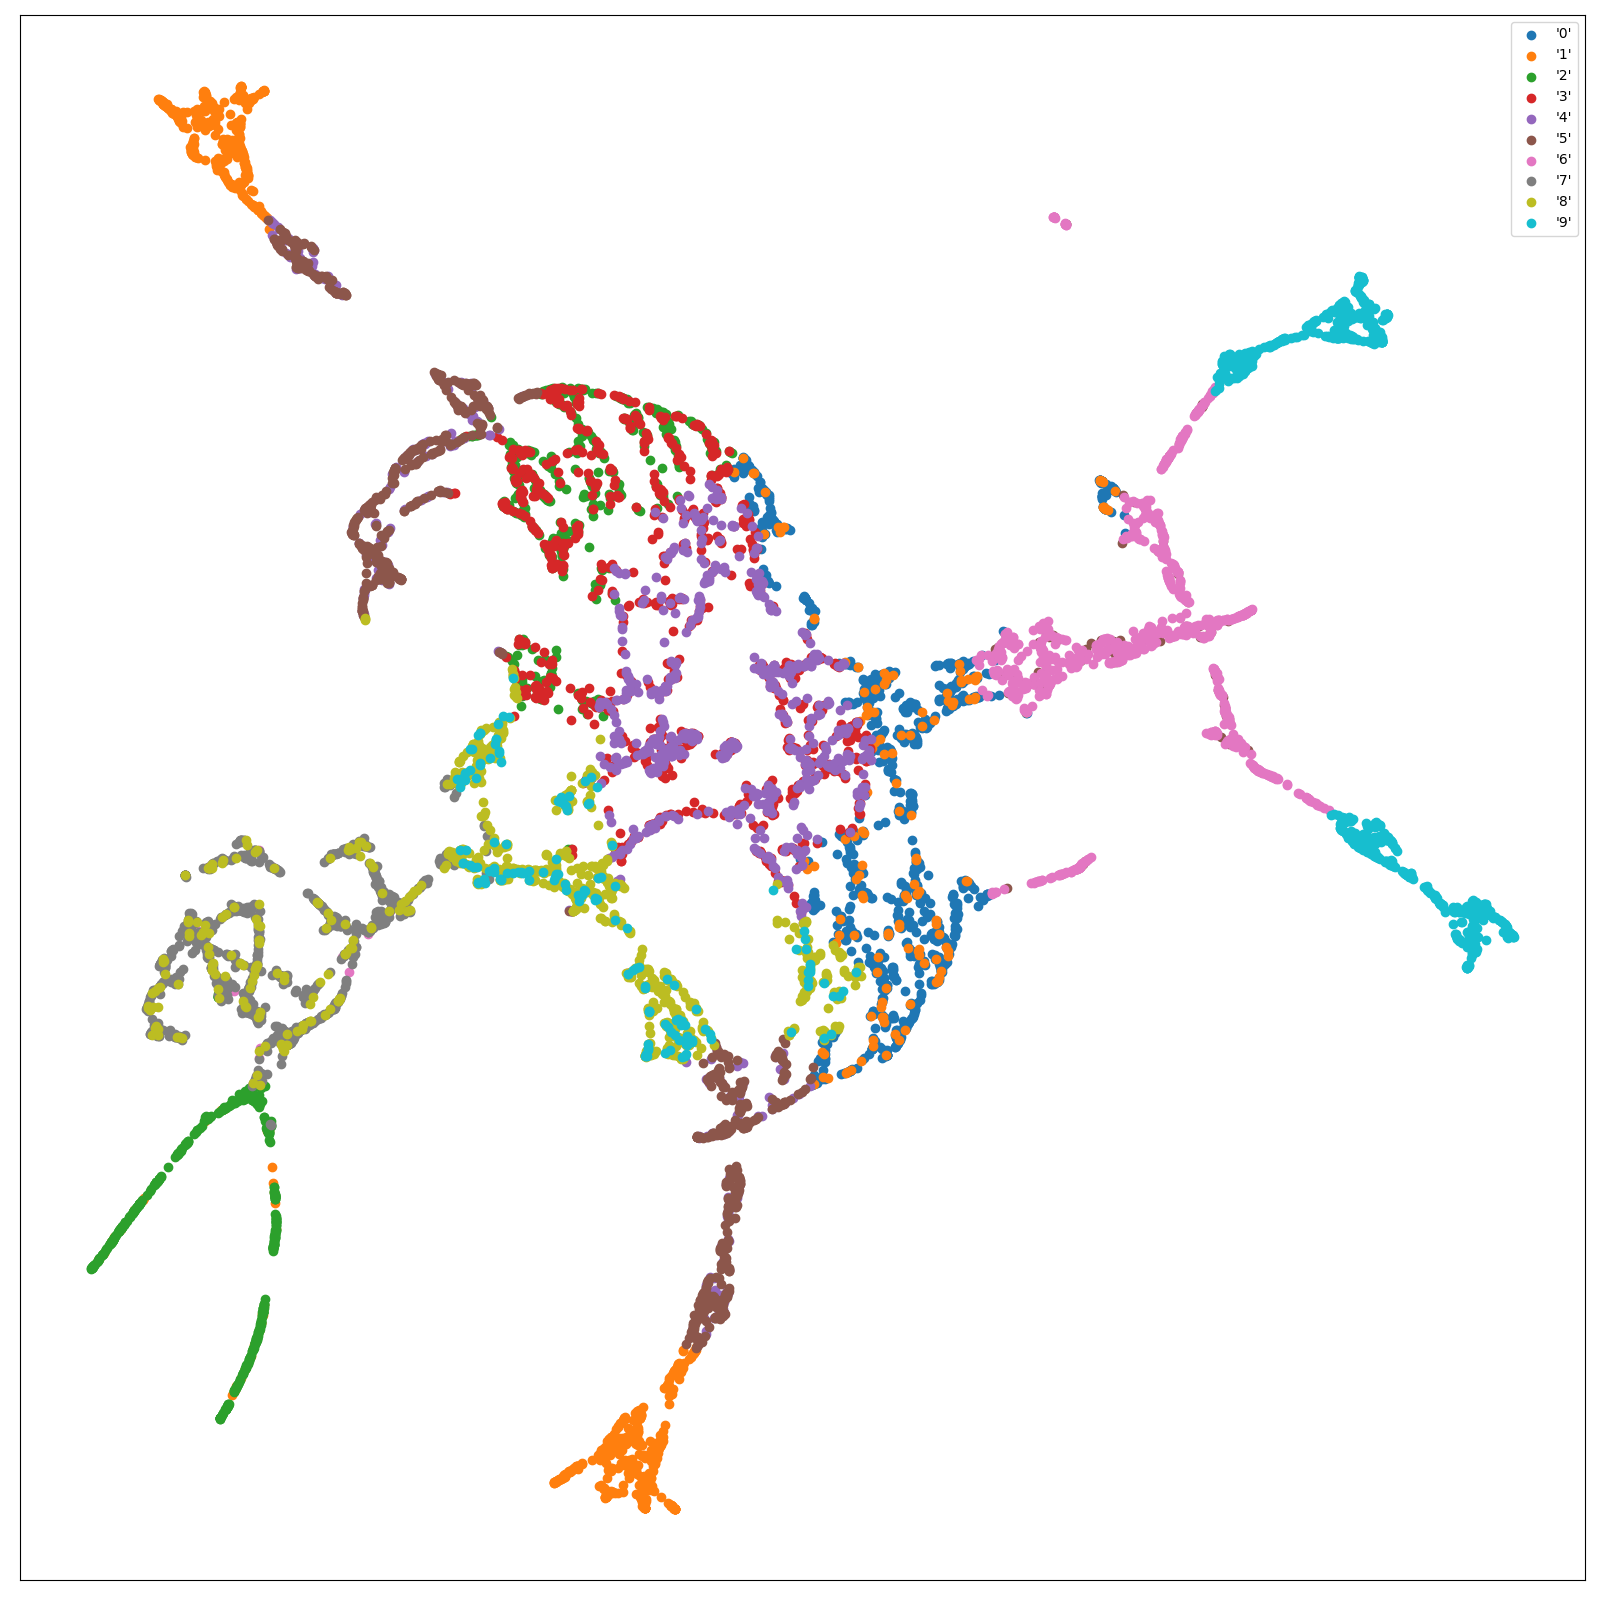

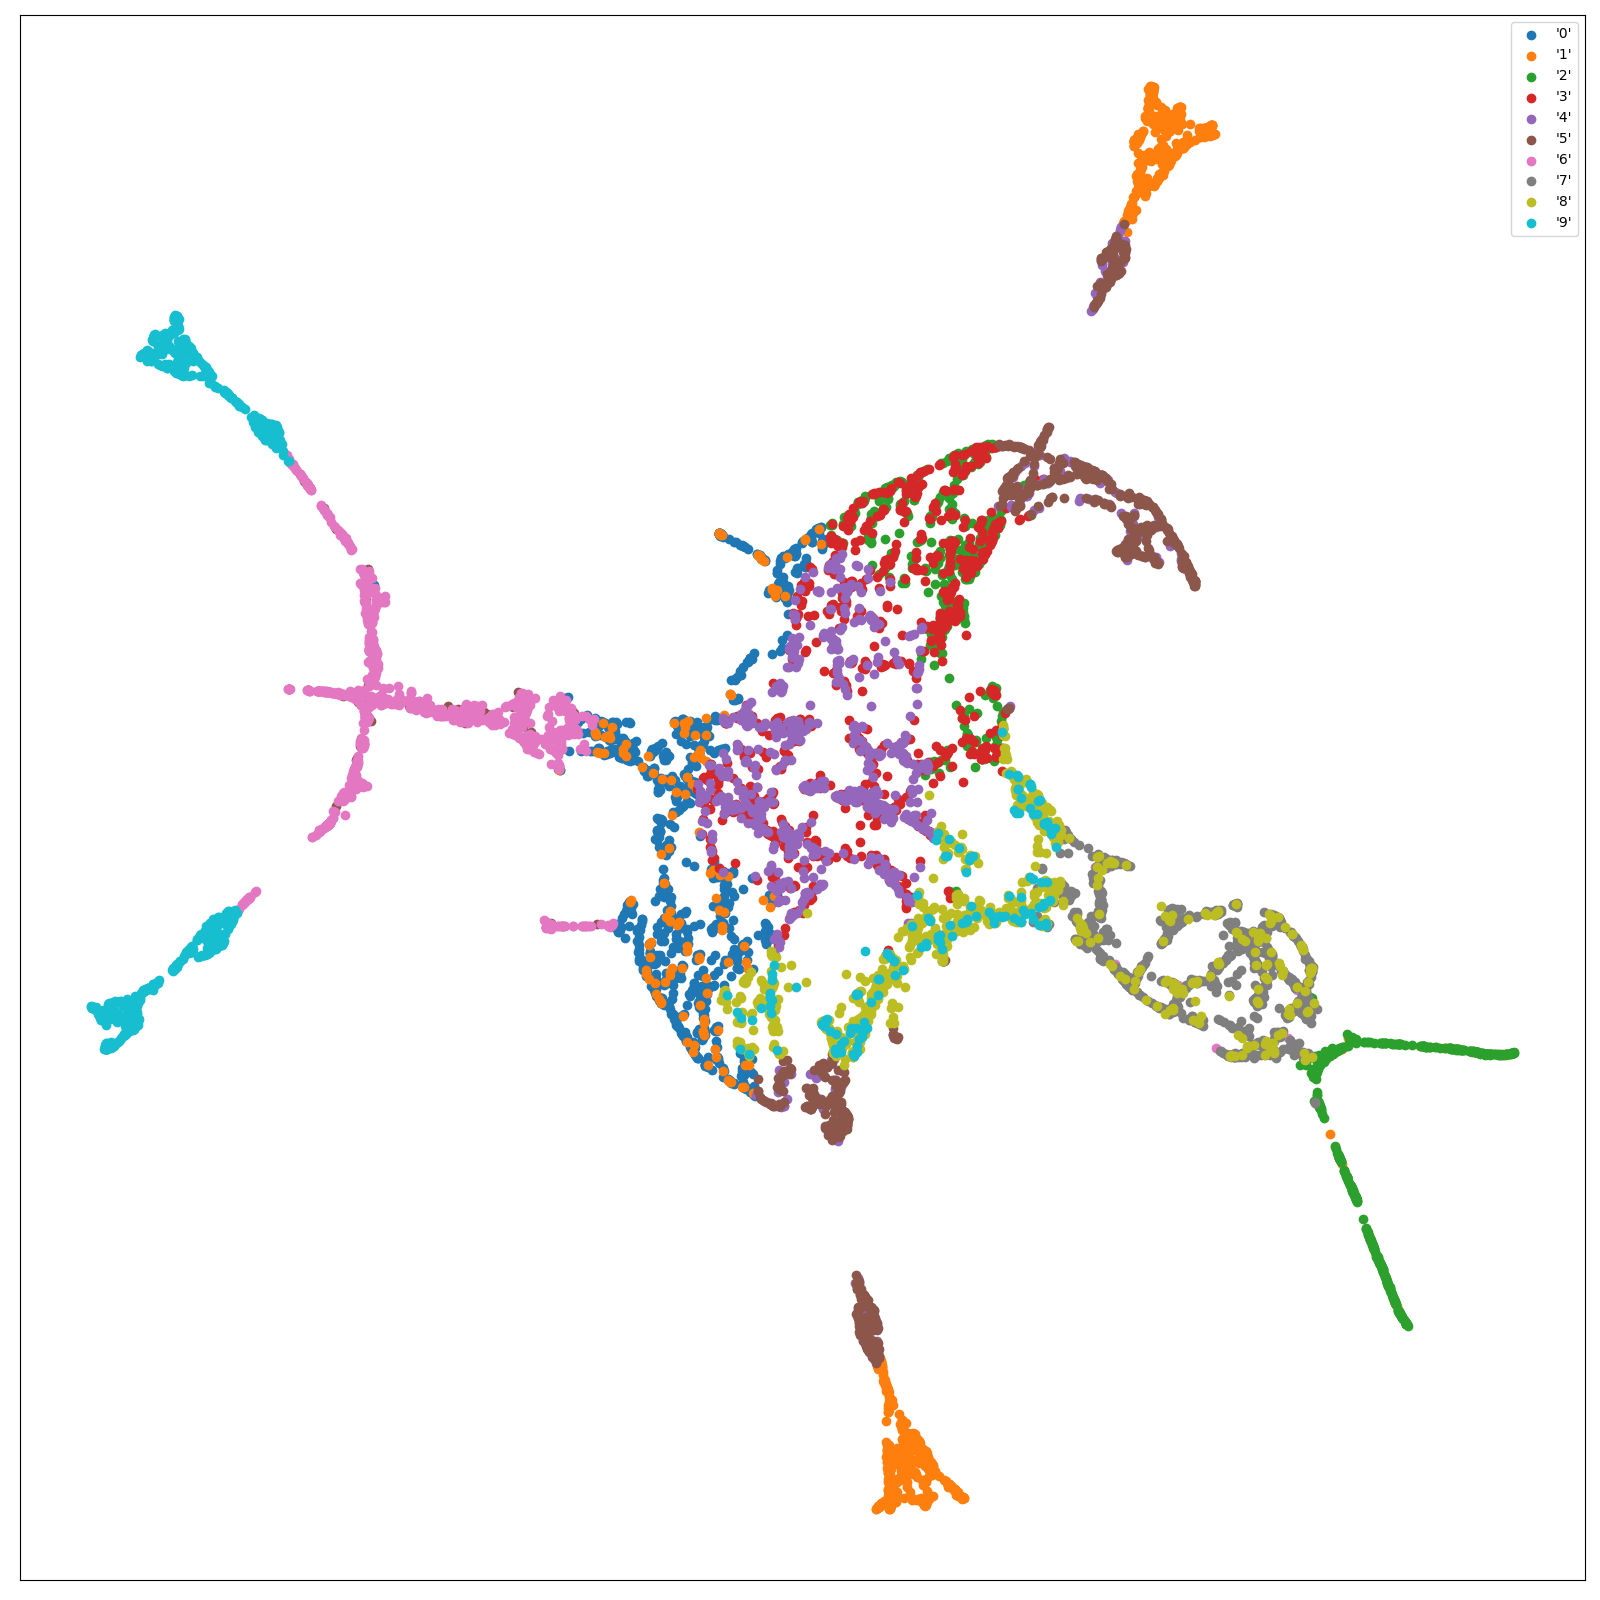

In [12]:
plot_2d_mammoth_scatter(x_10_umap, mammoth_classes)
plot_2d_mammoth_scatter(x_20_umap, mammoth_classes)
plot_2d_mammoth_scatter(x_50_umap, mammoth_classes)

## TriMAP

## PaCMAP

## IVHD

### Let's generate mammoth labels and 3d points to csv for IVHD script

In [31]:
df_mammoth_labels = pd.DataFrame(data=mammoth_classes)

filepath = Path('data/mammoth_3d.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_mammoth.to_csv(filepath, header=False, index=False)


filepath = Path('data/mammoth_labels.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_mammoth_labels.to_csv(filepath, header=False, index=False)

### Let's now use IVHD to visualize mammoth in 2D

In [42]:
# WIP - wtf is graph supposed to be TODO
import os

command = '{dir} "{data_csv}" "{labels_csv}" "{gp}" {output} {iter} {nn} {rn} {bd} {rns} {rnc} {l1s} "{optimizer}"'.format(
    dir = "./viskit/viskit_offline/viskit_offline",
    data_csv = "./data/mammoth_3d.csv",
    labels_csv = "./data/mammoth_labels.csv",
    gp = "./data/mammoth.bin", # graph path
    output = "./data/ivhd_mammoth.txt",
    iter = 2500,
    nn = 2, # nearestNeighborsCount
    rn = 1, # randomNeighborsCount
    bd = 1, # binaryDistances
    rns = 0, # reverseNeighborsSteps
    rnc = 0, # reverseNeighborsCount
    l1s = 0, # l1Steps
    optimizer = "force-directed"
)

os.system(command)

./viskit/viskit_offline/viskit_offline "./data/mammoth_3d.csv" "./data/mammoth_labels.csv" "./data/mammoth.bin" ./data/ivhd_mammoth.txt 2500 2 1 1 0 0 0 "force-directed"
[Info] [CSV Parser] Loading dataset from file: ./data/mammoth_3d.csv
[Info] [CSV Parser] Loading dataset from file: ./data/mammoth_labels.csv
[Info] [CSV Parser] Labels file passed.
[Info] [CSV Parser] Dataset size: 10000
[Info] [CSV Parser] Dataset dimensionality: 3
[Info] [CSV Parser] Number of classes in dataset: 10
[Info] [CSV Parser] Finished.
[Info] [Graph] Loading graph from cache...


viskit_offline: /home/ewer/Desktop/projekt/viskit/viskit/graph/Graph.cpp:216: bool viskit::graph::Graph::loadNearestNeighborsFromCache(const string&, size_t, bool): Assertion `splits.size() == 3' failed.
Aborted (core dumped)


34304

## Method comparison